# Chapter 7 -- ULYSSES'COMPASS

In [1]:
library(rethinking)

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.7, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan

Loading required package: parallel

rethinking (Version 2.21)


Attaching package: ‘rethinking’


The following object is masked from ‘package:rstan’:

    stan


The following object is masked from ‘package:stats’:

    rstudent




In [2]:
set.seed(1412)

## 7E1.

State the three motivating criteria that define information entropy. Try to express each in your
own words.

1. Uncertaintly needs to be continuous such that a small change in probability will not result in a large change in uncertainty. 

2. increase with the number of possible events (complexity?)

3. additivity -- combination over individual indepedent events should be the sum of all uncertainties

### 7E2.
Suppose a coin is weighted such that, when it is tossed and lands on a table, it comes up heads
70% of the time. What is the entropy of this coin?


In [3]:
-(0.7*log(0.7)+0.3*log(0.3))

[1] 0.6108643

### 7E3.
Suppose a four-sided die is loaded such that, when tossed onto a table, it shows “1” 20%, “2” 25%, “3” 25%, and “4” 30% of the time. What is the entropy of this die?

In [4]:
-(0.2*log(0.2)+0.25*log(0.25)+0.25*log(0.25)+0.3*log(0.3))

[1] 1.376227

### 7E4.
Suppose another four-sided die is loaded such that it never shows “4”. The other three sides show equally often. What is the entropy of this die?

In [5]:
-3*(1/3*log(1/3))

[1] 1.098612

### 7M1.

Write down and compare the definitions of AIC and WAIC. Which of these criteria is most
general? Which assumptions are required to transform the more general criterion into a less general
one?

AIC = -2lppd + 2p p is the number of free parameters in the posterior distribution

WAIC = -2(lppd-$\sum_{i} \textrm{var}\log p(y_i|\theta))$

WAIC is more general. Equivalence requires posterior distribution to be approximately multivariate Gaussian, and sample size  N >> k where k is the # of parameters

### 7M2.

Explain the difference between model selection and model comparison. What information is lost under model selection?


model selection is to choose a model among many models based on a criteria (say, lowest of the information criteria). This method disregards causal models and also discards the information contained in the differences between models (i.e. the undertainty of the differences). 

model comparison compares models by calculating the differences (relative performance) of WAIC and provides information on the improvement of predictions coming from conditioning on different variables (among differet models). PSIS can also tell the outliers. 

### 7M3.

When comparing models with an information criterion, why must all models be fit to exactly the same observations? What would happen to the information criterion values, if the models were fit to different numbers of observations? Perform some experiments, if you are not sure.


Information criteria are evaluated pointwise, so if you fit to different obserservations you might be introducing additional/less penalities and unfiar

### 7M4.

What happens to the effective number of parameters, as measured by PSIS or WAIC, as a prior
becomes more concentrated? Why? Perform some experiments, if you are not sure.

It should become smaller, because now prior is regularized and penalizes certain areas in the support. So the variance penalty will become smaller as the posterior is also sharper

### 7M5.

Provide an informal explanation of why informative priors reduce overfitting.

Because it restricted the prob. space of posterior so you are less likely to get to over complicated models for overfitting

### 7M6.

Provide an informal explanation of why overly informative priors result in underfitting.


Because it over-restricts the space of the posterior so now you don't have enough freedom to fit to the data

### 7H1.

In 2007, The Wall Street Journal published an editorial (“We’re Number One, Alas”) with a graph of corporate tax rates in 29 countries plotted against tax revenue. A badly fit curve was drawn in (reconstructed
at right), seemingly by hand, to make the argument that the relationship
between tax rate and tax revenue increases and then declines, such that
higher tax rates can actually produce less tax revenue. I want you to actually fit a curve to these data, found in data(Laffer). Consider models
that use tax rate to predict tax revenue. Compare, using WAIC or PSIS, a
straight-line model to any curved models you like. What do you conclude
about the relationship between tax rate and tax revenue?

In [6]:
data(Laffer)
d <- Laffer

In [7]:
head(d)

,tax_rate,tax_revenue
,<dbl>,<dbl>
1,0.07,-0.06
2,8.81,2.45
3,12.84,3.58
4,16.24,2.19
5,19.18,2.46
6,19.29,1.95


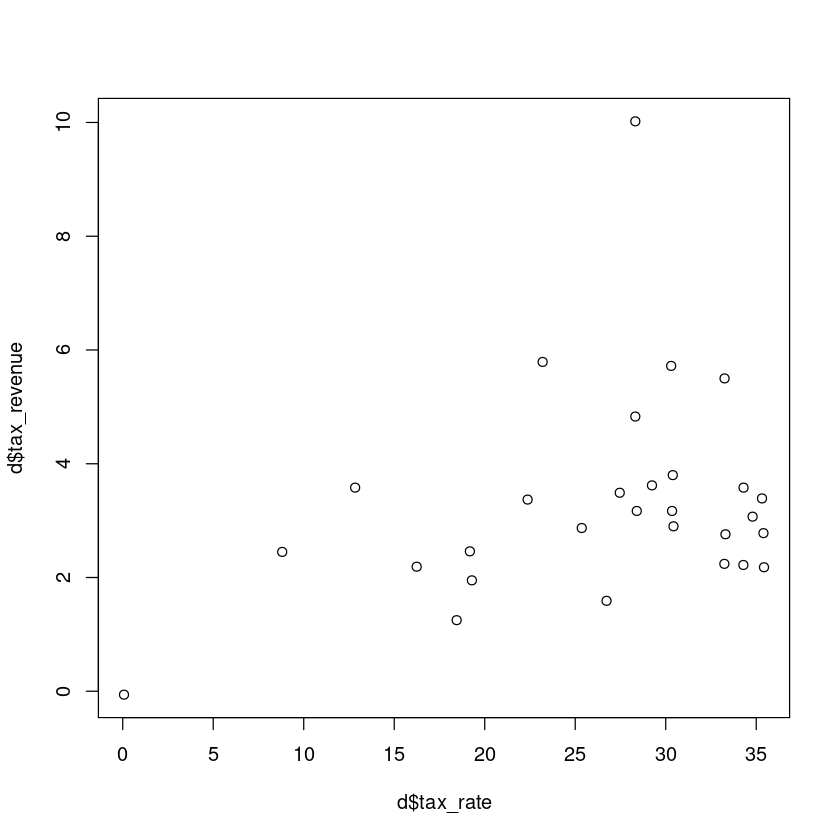

In [8]:
plot(d$tax_rate, d$tax_revenue)

In [9]:
d$s_tax_rate <- standardize(d$tax_rate)
d$s_tax_revenue <- standardize(d$tax_revenue)

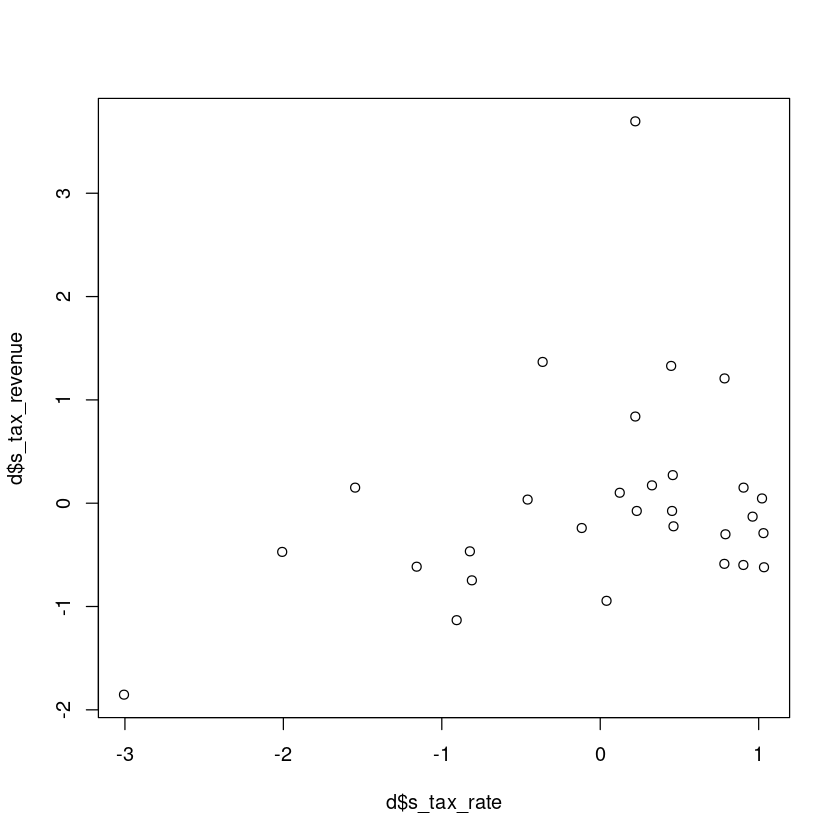

In [10]:
plot(d$s_tax_rate, d$s_tax_revenue)

In [21]:
model <- quap(
    alist(
        s_tax_revenue ~ dnorm(mu, sigma),
        mu <- a+b*s_tax_rate,
        a ~ dnorm(-2, 1),
        b ~ dnorm(0, 1),
        sigma ~ exp(1)
        ), data = d)

In [22]:
model_quad <- quap(
    alist(
        s_tax_revenue ~ dnorm(mu, sigma),
        mu <- a+b*s_tax_rate+c*s_tax_rate**2,
        a ~ dnorm(-2, 1),
        b ~ dnorm(0, 1),
        c ~ dnorm(0, 1),
        sigma ~ exp(1)
        ), data = d)

In [23]:
model_tri <- quap(
    alist(
        s_tax_revenue ~ dnorm(mu, sigma),
        mu <- a+b_1*s_tax_rate+b_2*s_tax_rate**2+b_3*s_tax_rate**3,
        a ~ dnorm(-2, 1),
        b_1 ~ dnorm(0, 1),
        b_2 ~ dnorm(0, 1),
        b_3 ~ dnorm(0, 1),
        sigma ~ exp(1)
        ), data = d)

In [24]:
compare(model, model_quad, model_tri, func=WAIC)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
model,117.2431,2.269864,0.0000000,NA,0.2282541,0.4984724
model_quad,118.2373,2.411073,0.9942338,0.6470743,0.4626564,0.3032117
model_tri,119.0864,2.643846,1.8433750,1.1825575,0.7205090,0.1983158


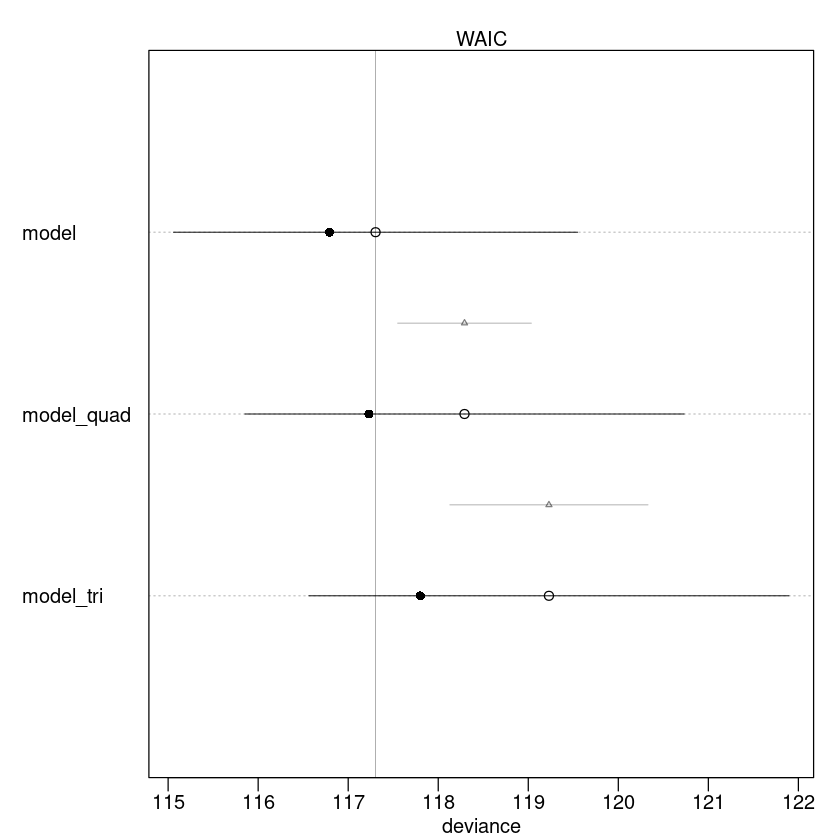

In [25]:
plot(compare(model, model_quad, model_tri, func=WAIC))

Inspecting the dWAIC, we see that model_quad is about 0.99+/-0.65 from the linear model, model_tri is about 0.85 +/-0.51 from model quad. It looks like there are still additional additive power with third order polynomial, but it diminishes

We see some high Pareto values, so there seem to be outliers, inspecting the plot this is plausible

### 7H2.
In the Laffer data, there is one country with a high tax revenue that is an outlier. Use PSIS
and WAIC to measure the importance of this outlier in the models you fit in the previous problem.
Then use robust regression with a Student’s t distribution to revisit the curve fitting problem. How
much does a curved relationship depend upon the outlier point?

In [26]:
compare(model, model_quad, model_tri, func=PSIS)

Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.



,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
model,117.3301,2.310321,0.0000000,NA,0.2468665,0.4952851
model_quad,118.2895,2.471685,0.9593919,0.7731149,0.5386608,0.3065674
model_tri,119.1623,2.749628,1.8322431,1.1708811,0.7476947,0.1981475


Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.



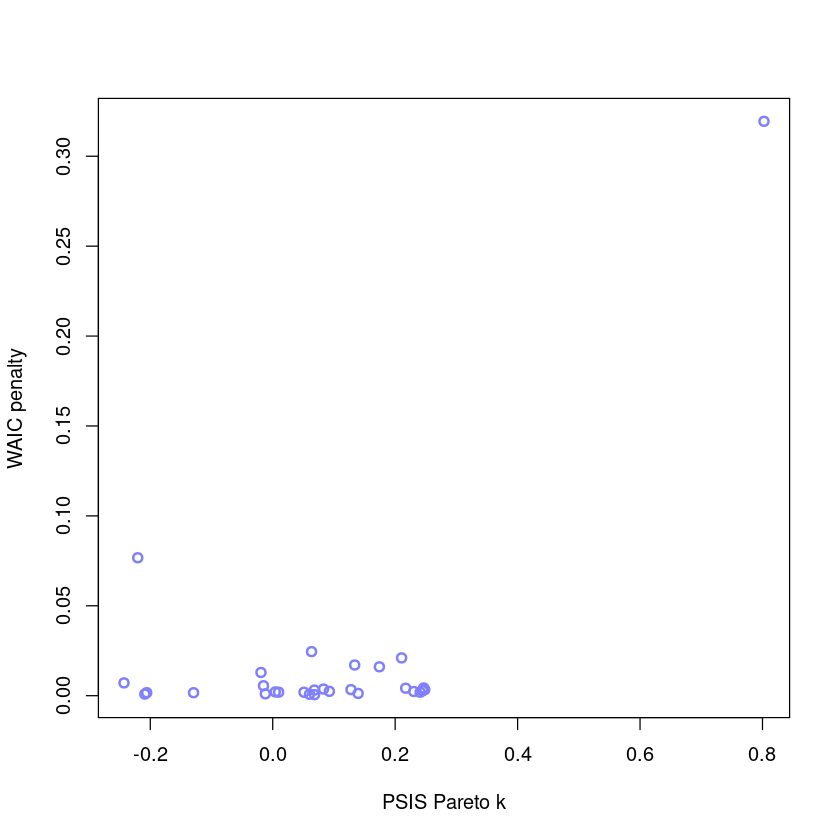

In [27]:
#use quad model
PSIS_m_quad <- PSIS(model_quad, pointwise = TRUE)
WAIC_m_quad <- WAIC(model_quad, pointwise = TRUE)

plot(PSIS_m_quad$k, WAIC_m_quad$penalty, xlab = 'PSIS Pareto k', ylab = 'WAIC penalty', col=rangi2, lwd=2)

see 2 outliers

replace with a student-t robust regression

In [30]:
model_quad_std_t <- quap(
    alist(
        s_tax_revenue ~ dstudent(2, mu, sigma),
        mu <- a+b*s_tax_rate+c*s_tax_rate**2,
        a ~ dnorm(-2, 1),
        b ~ dnorm(0, 1),
        c ~ dnorm(0, 1),
        sigma ~ dexp(1)
        ), data = d)

In [31]:
WAIC(model_quad_std_t)

WAIC,lppd,penalty,std_err
<dbl>,<dbl>,<dbl>,<dbl>
71.22325,-31.52596,4.085666,14.11667


In [32]:
PSIS(model_quad_std_t)

PSIS,lppd,penalty,std_err
<dbl>,<dbl>,<dbl>,<dbl>
71.58255,-35.79128,4.261104,14.50146


no more warning

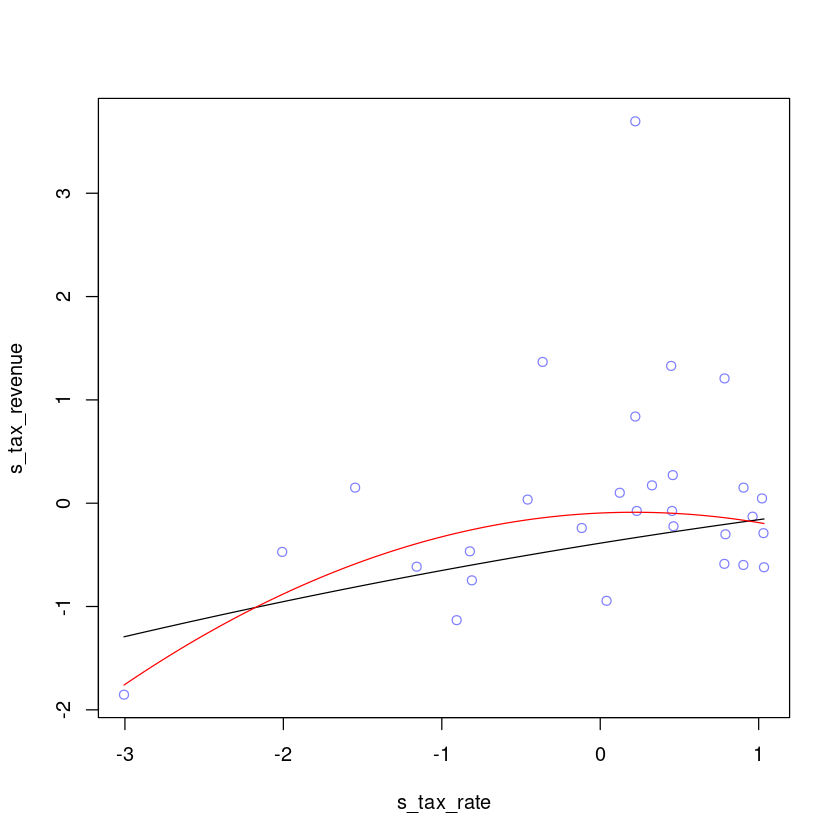

In [66]:
plot(s_tax_revenue ~ s_tax_rate, data = d, col=rangi2)
post_m_quad <- extract.samples(model_quad)
curve(mean(post_m_quad$a)+mean(post_m_quad$b)*x+mean(post_m_quad$c)*x**2, add=TRUE)
post_m_quad_t <- extract.samples(model_quad_std_t)
curve(mean(post_m_quad_t$a)+mean(post_m_quad_t$b)*x+mean(post_m_quad_t$c)*x**2, add=TRUE, col='red')

The student-t robust regression is much less influenced by the outliers than the normal one

### 7H3.
Consider three fictional Polynesian islands. On each there is a Royal Ornithologist charged by
the king with surveying the bird population. They have each found the following proportions of 5
important bird species:


| Island |Species A | Species B | Species C | Species D | Species E |
| --- | --- | --- |  --- | --- | --- |
|Island 1| 0.2 | 0.2 | 0.2 | 0.2 | 0.2 |
|Island 2| 0.8| 0.1| 0.05| 0.025| 0.025|
|Island 3 |0.05 |0.15 |0.7 |0.05 |0.05|


Notice that each row sums to 1, all the birds. This problem has two parts. It is not computationally
complicated. But it is conceptually tricky. First, compute the entropy of each island’s bird distribution.
Interpret these entropy values. Second, use each island’s bird distribution to predict the other two.
This means to compute the KL divergence of each island from the others, treating each island as if it
were a statistical model of the other islands. You should end up with 6 different KL divergence values.
Which island predicts the others best? Why?

In [77]:
entropy_1 = -5*0.2*log(0.2)

In [78]:
entropy_1

[1] 1.609438

In [79]:
entropy_2 = -( 0.8*log(0.8) + 0.1*log(0.1) + 0.05*log(0.05) + 2*0.025*log(0.025) )

In [80]:
entropy_2

[1] 0.7430039

In [81]:
entropy_3 = - (0.05*log(0.05) + 0.15*log(0.15)+0.7*log(0.7) + 2*0.05*log(0.05) )

In [82]:
entropy_3

[1] 0.9836003

Entropy meant the uncertainty about the probability of meeting the next bird species

In [85]:
island_1 <- c(0.2, 0.2, 0.2, 0.2, 0.2)
island_2 <- c(0.8, 0.1, 0.05, 0.025, 0.025)
island_3 <- c(0.05, 0.15, 0.7, 0.05, 0.05)

In [88]:
sum(island_1*log(island_1/island_2))

[1] 0.9704061

In [89]:
sum(island_2*log(island_2/island_1))

[1] 0.866434

In [90]:
sum(island_3*log(island_3/island_1))

[1] 0.6258376

In [93]:
sum(island_1*log(island_1/island_3))

[1] 0.6387604

In [91]:
sum(island_3*log(island_3/island_2))

[1] 1.838845

In [94]:
sum(island_2*log(island_2/island_3))

[1] 2.010914

2 and 3 have really large divergence (>1), because on island 2 there's small prob for specie C

### 7H4.

Recall the marriage, age, and happiness collider bias example from Chapter 6. Run models
m6.9 and m6.10 again (page 178). Compare these two models usingWAIC (or PSIS, they will produce
identical results). Which model is expected to make better predictions? Which model provides the
correct causal inference about the influence of age on happiness? Can you explain why the answers
to these two questions disagree?

In [95]:
d <- sim_happiness( seed=1977 , N_years=1000 )
precis(d)

## R code 6.22
d2 <- d[ d$age>17 , ] # only adults
d2$A <- ( d2$age - 18 ) / ( 65 - 18 )

## R code 6.23
d2$mid <- d2$married + 1
m6.9 <- quap(
    alist(
        happiness ~ dnorm( mu , sigma ),
        mu <- a[mid] + bA*A,
        a[mid] ~ dnorm( 0 , 1 ),
        bA ~ dnorm( 0 , 2 ),
        sigma ~ dexp(1)
    ) , data=d2 )
precis(m6.9,depth=2)

## R code 6.24
m6.10 <- quap(
    alist(
        happiness ~ dnorm( mu , sigma ),
        mu <- a + bA*A,
        a ~ dnorm( 0 , 1 ),
        bA ~ dnorm( 0 , 2 ),
        sigma ~ dexp(1)
    ) , data=d2 )
precis(m6.10)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
age,3.300000e+01,18.768883,4.000000,62.000000,▇▇▇▇▇▇▇▇▇▇▇▇▇
married,3.007692e-01,0.458769,0.000000,1.000000,▇▁▁▁▁▁▁▁▁▃
happiness,-1.000070e-16,1.214421,-1.789474,1.789474,▇▅▇▅▅▇▅▇


,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],-0.2350877,0.06348986,-0.3365568,-0.1336186
a[2],1.2585517,0.08495989,1.1227694,1.3943340
bA,-0.7490274,0.11320112,-0.9299447,-0.5681102
sigma,0.9897080,0.02255800,0.9536559,1.0257600


,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,1.649248e-07,0.07675015,-0.1226614,0.1226617
bA,-2.728620e-07,0.13225976,-0.2113769,0.2113764
sigma,1.213188e+00,0.02766080,1.1689803,1.2573949


In [97]:
compare(m6.10, m6.9, func=WAIC)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m6.9,2713.797,37.55914,0.0000,NA,3.647937,1.0000e+00
m6.10,3102.072,27.75233,388.2746,35.46971,2.423316,4.8667e-85


the causal model is  H -> M <- A, this is a collider, so we will see spurious relation

WAIC shows m6.9 is a better model, but this is not consistent with the causal model. But this model has better predicative power because knowing whether you are married gives you additional predicative power on happiness. 

### 7H5.
Revisit the urban fox data, data(foxes), from the previous chapter’s practice problems. Use
WAIC or PSIS based model comparison on five different models, each using weight as the outcome,
and containing these sets of predictor variables:

(1) avgfood + groupsize + area

(2) avgfood + groupsize

(3) groupsize + area

(4) avgfood

(5) area

Can you explain the relative differences in WAIC scores, using the fox DAG from the previous chapter? Be sure to pay attention to the standard error of the score differences (dSE).

In [103]:
data(foxes)

In [104]:
d <- foxes

In [107]:
d$s_area <- standardize(d$area)
d$s_weight<- standardize(d$weight)
d$s_avgfood <- standardize(d$avgfood)
d$s_groupsize <- standardize(d$groupsize)

In [110]:
m_5<- quap(
    alist(
        s_weight ~ dnorm(mu, sigma),
        mu <- a + b*s_area,
        a ~ dnorm(0,0.5),
        b ~ dnorm(0, 0.5),
        sigma ~ exp(1)
        ), data = d)

In [111]:
m_4<- quap(
    alist(
        s_weight ~ dnorm(mu, sigma),
        mu <- a + b*s_avgfood,
        a ~ dnorm(0,0.5),
        b ~ dnorm(0, 0.5),
        sigma ~ exp(1)
        ), data = d)

In [113]:
m_1<- quap(
    alist(
        s_weight ~ dnorm(mu, sigma),
        mu <- a + b1*s_avgfood+b2*s_groupsize+b3*s_area,
        a ~ dnorm(0,0.5),
        b1 ~ dnorm(0, 0.5),
        b2 ~ dnorm(0, 0.5),
        b3 ~ dnorm(0, 0.5),
        sigma ~ exp(1)
        ), data = d)

In [114]:
m_2<- quap(
    alist(
        s_weight ~ dnorm(mu, sigma),
        mu <- a + b1*s_avgfood+b2*s_groupsize,
        a ~ dnorm(0,0.5),
        b1 ~ dnorm(0, 0.5),
        b2 ~ dnorm(0, 0.5),
        sigma ~ exp(1)
        ), data = d)

In [115]:
m_3<- quap(
    alist(
        s_weight ~ dnorm(mu, sigma),
        mu <- a + b1*s_area+b2*s_groupsize,
        a ~ dnorm(0,0.5),
        b1 ~ dnorm(0, 0.5),
        b2 ~ dnorm(0, 0.5),
        sigma ~ exp(1)
        ), data = d)

In [116]:
compare(m_1,m_2,m_3,m_4,m_5, func=WAIC)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m_2,462.1220,1.798097,0.00000000,NA,0.2511294,0.2276360
m_3,462.1704,1.781199,0.04843702,0.2435209,0.2800982,0.2221892
m_1,462.4784,1.781305,0.35642961,0.2453691,0.3445686,0.1904773
m_5,462.5849,1.779173,0.46289223,0.4192192,0.2266290,0.1806031
m_4,462.6017,1.778694,0.47966909,0.3495400,0.2105078,0.1790944


we note that not much happens between m_5, m_4 (the dWAIC are similar and the dSE are similar), so swapping avgfood and area doesn't do much. This is because area -> avgfood -> weight, so area and avgfood are causally the same. But they perform badly becasue there is a backdoor on avgfood -> groupsize -> weight

the winner is avgfood + groupsize. this is actually the correct causal model as we break the backdoor path avgfood->groupsize->weight. 1 and 2 shouldn't be different as area-> avgfood so avgfood already contains all information on area. 3 is bad because the backdoor is still there